# Análise Exploratória de Dados (EDA)
### Problema a ser resolvido:

O problema a ser resolvido neste projeto é a identificação dos principais fatores que levam ao churn dos clientes e o desenvolvimento de estratégias eficazes para reduzir essa taxa de saída. Utilizando a base de dados do banco, o objetivo é responder às seguintes perguntas:

1. Quais são os fatores mais relevantes que influenciam os clientes a deixarem o banco? 

2. Existem padrões específicos relacionados a localização geográfica ou perfil demográfico?

3. Como o comportamento dos clientes que deixam o banco se diferencia daqueles que permanecem?

4. Quais características devem ser priorizadas para estratégias de retenção?


In [1458]:
# É necessário importar as biliotecas que serão úteis para a análise exploratória.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [1459]:
# Importando a base de dados atualizada (pós tratamento).
base_atualizada = pd.read_csv('BASE_FINAL.csv')

In [1460]:
# Verificação da base de dados.
base_atualizada.head()

,Id Cliente,Sobrenome,Pontuacao Credito,Pais,Genero,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1461]:
# Excluindo colunas que não serão necessárias.
base_atualizada.drop(columns=['Id Cliente'], inplace= True)
base_atualizada.drop(columns = ['Sobrenome'], inplace = True ) 
base_atualizada.head()

,Pontuacao Credito,Pais,Genero,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1462]:
# Verificação das informações gerais da base atualizada.
base_atualizada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pontuacao Credito      10000 non-null  int64  
 1   Pais                   10000 non-null  object 
 2   Genero                 10000 non-null  object 
 3   Idade                  10000 non-null  int64  
 4   Tempo De Vinculo       10000 non-null  int64  
 5   Saldo                  10000 non-null  float64
 6   Numero De Produtos     10000 non-null  int64  
 7   Possui Cartao Credito  10000 non-null  int64  
 8   Membro Ativo           10000 non-null  int64  
 9   Salario Estimado       10000 non-null  float64
 10  Saiu                   10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [1463]:
# Verificação estatística do Dataframe.
base_atualizada.describe()

,Pontuacao Credito,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Dicionário dos Dados
- Pontuação Crédito: Pontuação de crédito atribuída ao cliente, que reflete seu histórico de crédito.

- País: Localização geográfica do cliente (país de residência).

- Gênero: Gênero do cliente (masculino ou feminino).

- Idade: Idade do cliente.

- Tempo sendo cliente: Número de anos em que o cliente mantém uma conta no banco.

- Saldo: Saldo disponível na conta do cliente.

- Número De Produtos: Número de produtos ou serviços financeiros que o cliente utiliza no banco.

- Possui Cartão Crédito: Indica se o cliente possui um cartão de crédito emitido pelo banco (1 para sim, 0 para não).


- Membro Ativo: Indica se o cliente é um membro ativo, ou seja, utiliza regularmente os serviços do banco (1 para sim, 0 para não).

- Salário Estimado: Estimativa do salário anual do cliente.

- Saiu: Indica se o cliente saiu do banco (1 para sim, 0 para não).

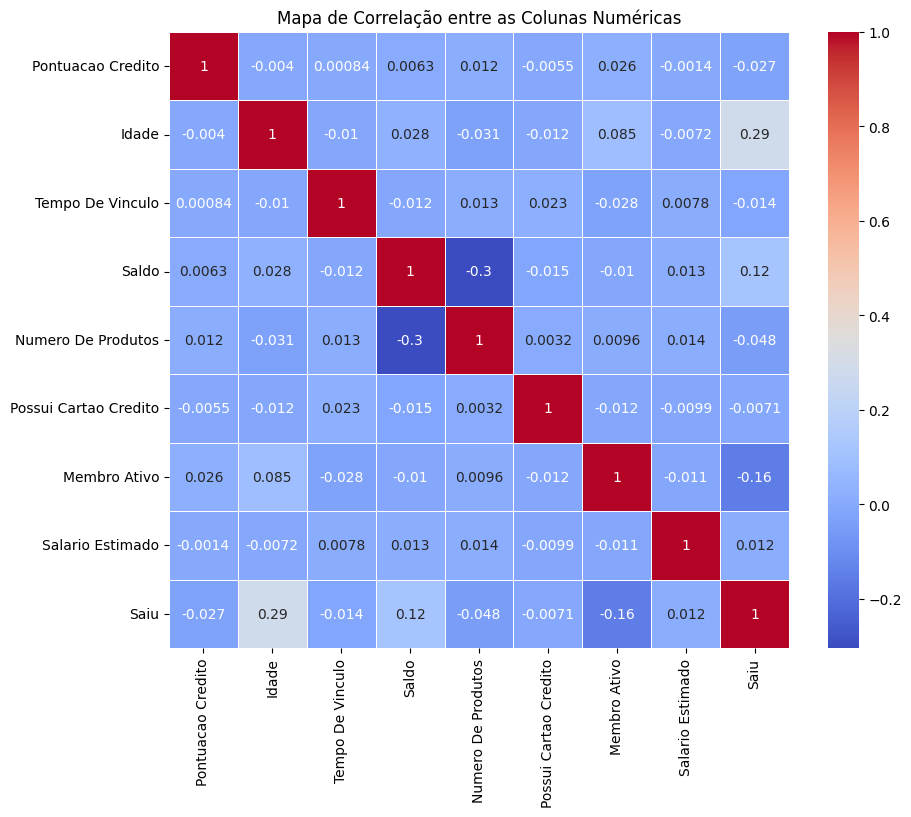

In [1464]:
# Gerando o mapa de correlação da 'base_atualizada'.

# Selecionar apenas colunas numéricas.
colunas_numericas = base_atualizada.select_dtypes(include=['float64', 'int64'])

# Inicializar o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Aplicar a escala min-max em todas as colunas numéricas do DataFrame
base_final_scaled = scaler.fit_transform(colunas_numericas)

# Calcular a correlação entre as colunas numéricas
correlacao = pd.DataFrame(base_final_scaled, columns=colunas_numericas.columns).corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criar o mapa de calor
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)

# Título do gráfico
plt.title('Mapa de Correlação entre as Colunas Numéricas')

# Mostrar o gráfico
plt.show()



### Insights Sobre a Correlação das Variáveis Numéricas.

O foco deste mapa de correlação é com a coluna 'Saiu', pois ela indica se o cliente deixou o serviço ou não, sendo uma variável crucial para entender os padrões de churn. Ao analisar as correlações com essa coluna, podemos identificar quais variáveis possuem maior influência sobre a saída dos clientes.

Quanto mais próximo de 0, mais fraca é a correlação entre as variáveis, indicando pouca ou nenhuma relação linear entre elas. Por outro lado, quanto mais distante de 0 (em direção a -1 ou 1), mais forte é a correlação, com -1 indicando uma correlação negativa perfeita e 1 indicando uma correlação positiva perfeita. Os valores variam de -1 a 1.


Nota-se que, embora não existam correlações fortes entre as variáveis numéricas, é essencial realizar uma investigação mais aprofundada dessas variáveis, pois elas ainda podem revelar insights valiosos para o banco europeu.

### 1- Fatores Relevantes
Vamos explorar as principais correlações identificadas para obter insights importantes. Para isso, iremos dividir a base atualizada em duas partes distintas: uma que representa os clientes que saíram e outra que representa os clientes que ficaram. Em seguida, vamos criar gráficos comparativos para analisar as correlações mais significativas que podem ter influenciado no churn dos clientes.  
                        


In [1465]:
# Divisão da base de dados.
clientes_churn = base_atualizada[base_atualizada['Saiu'] == 1]
clientes_stay = base_atualizada[base_atualizada['Saiu'] == 0]

In [1466]:
# Verificação da base 'clientes_churn'.
clientes_churn.head()

,Pontuacao Credito,Pais,Genero,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [1467]:
# Verificando a base 'clientes_stay'.
clientes_stay.head()

,Pontuacao Credito,Pais,Genero,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


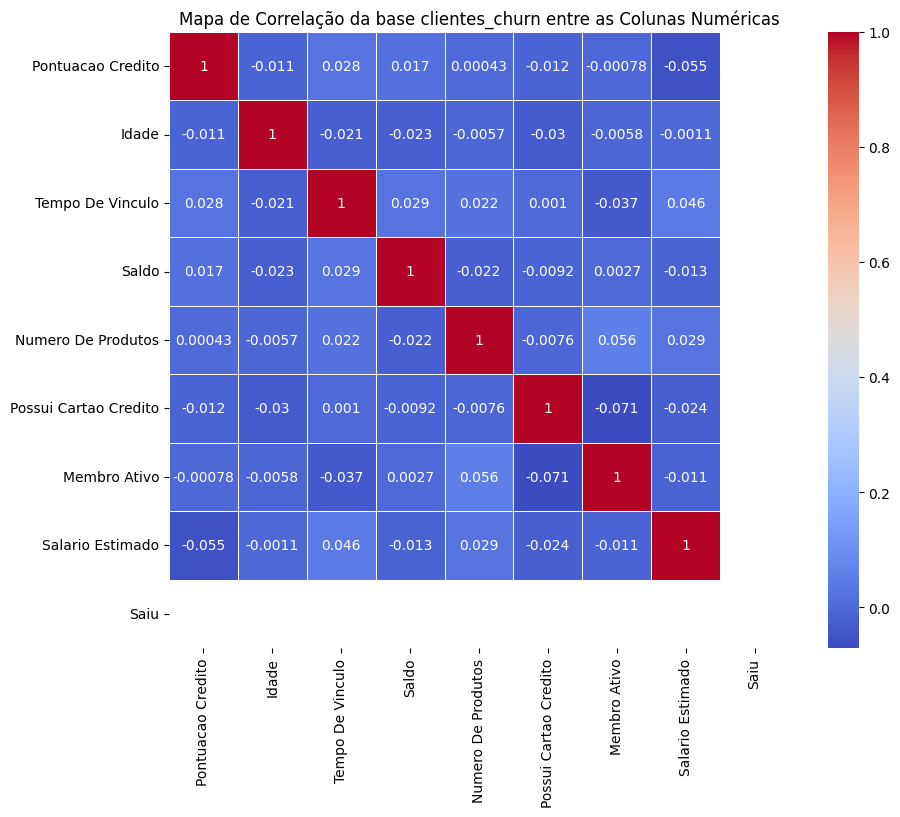

In [1468]:
# Plotando o mapa de correlação entre as colunas numéricas da base 'clientes_churn'.

# Selecionar apenas colunas numéricas
colunas_numericas = clientes_churn.select_dtypes(include=['float64', 'int64'])

# Inicializar o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Aplicar a escala min-max em todas as colunas numéricas do DataFrame
base_final_scaled = scaler.fit_transform(colunas_numericas)

# Calcular a correlação entre as colunas numéricas
correlacao = pd.DataFrame(base_final_scaled, columns=colunas_numericas.columns).corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criar o mapa de calor
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)

# Título do gráfico
plt.title('Mapa de Correlação da base clientes_churn entre as Colunas Numéricas')

# Mostrar o gráfico
plt.show()

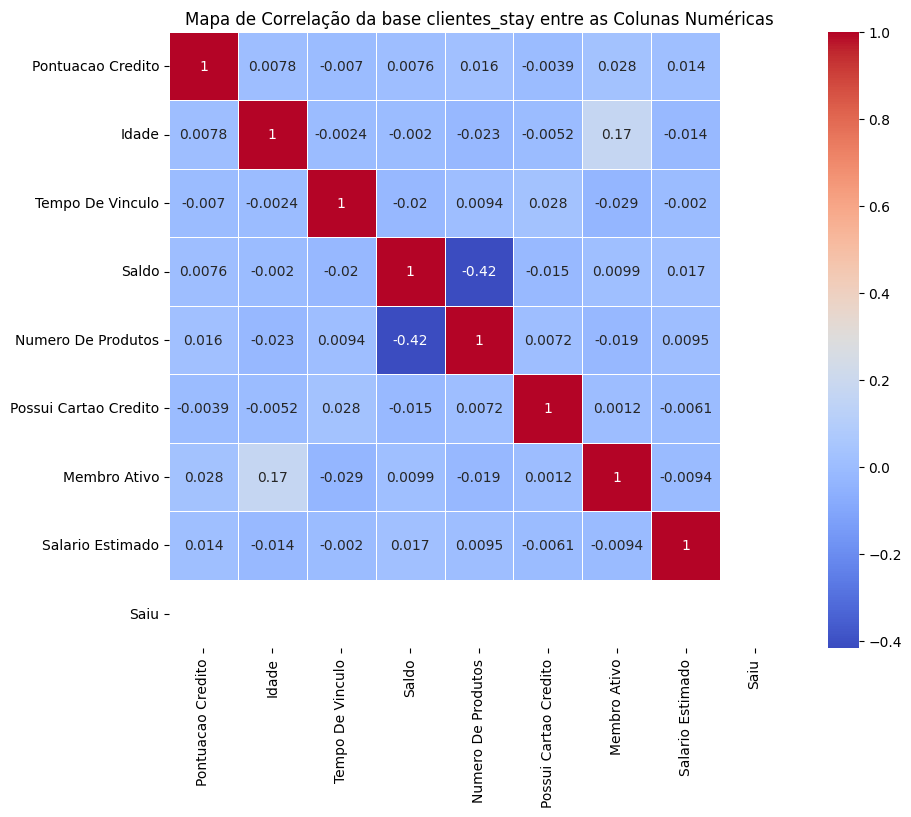

In [1469]:
# Plotando o mapa de correlação entre as colunas numéricas da base 'clientes_stay'.


# Selecionar apenas colunas numéricas
colunas_numericas = clientes_stay.select_dtypes(include=['float64', 'int64'])

# Inicializar o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Aplicar a escala min-max em todas as colunas numéricas do DataFrame
base_final_scaled = scaler.fit_transform(colunas_numericas)

# Calcular a correlação entre as colunas numéricas
correlacao = pd.DataFrame(base_final_scaled, columns=colunas_numericas.columns).corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criar o mapa de calor
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)

# Título do gráfico
plt.title('Mapa de Correlação da base clientes_stay entre as Colunas Numéricas')

# Mostrar o gráfico
plt.show()

### Insights.
- Mesmo com a separação das bases entre os clientes que permaneceram e aqueles que deixaram o serviço do banco, ainda não foram observadas correlações expressivas. Isso indica que as variáveis numéricas analisadas não possuem uma relação linear significativa com o churn.


Agora vamos analisar as faixas etárias com maior incidência de churn e buscar insights relevantes a partir dessas informações.

In [1470]:
# Analisando as faixas etárias com maior incidência de churn.

# Agrupando as idades em faixas etárias.
faixa_etaria = pd.cut(clientes_churn['Idade'], bins=[0, 34, 40, 45, 50, 55, 60, 65, 100], right=True, 
                       labels=['Abaixo de 35', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'])

# Contar as ocorrências em cada faixa etária
contagem_faixa_etaria = faixa_etaria.value_counts().sort_index()

contagem_faixa_etaria



Idade
Abaixo de 35    290
35-40           396
41-45           394
46-50           394
51-55           269
56-60           179
61-65            80
66+              35
Name: count, dtype: int64


Insight: Observa-se uma maior concentração de churn entre clientes na faixa etária de **35 a 50 anos**, que representa **58,1%** do total. Essa tendência pode indicar que estratégias específicas são necessárias para abordar e reter clientes dentro dessas idades, potencialmente desenvolvendo ofertas ou programas de fidelidade que atendam melhor a esse grupo. 

Para aprofundar essa análise, vamos gerar visualizações gráficas que ajudem a compreender melhor esses padrões.

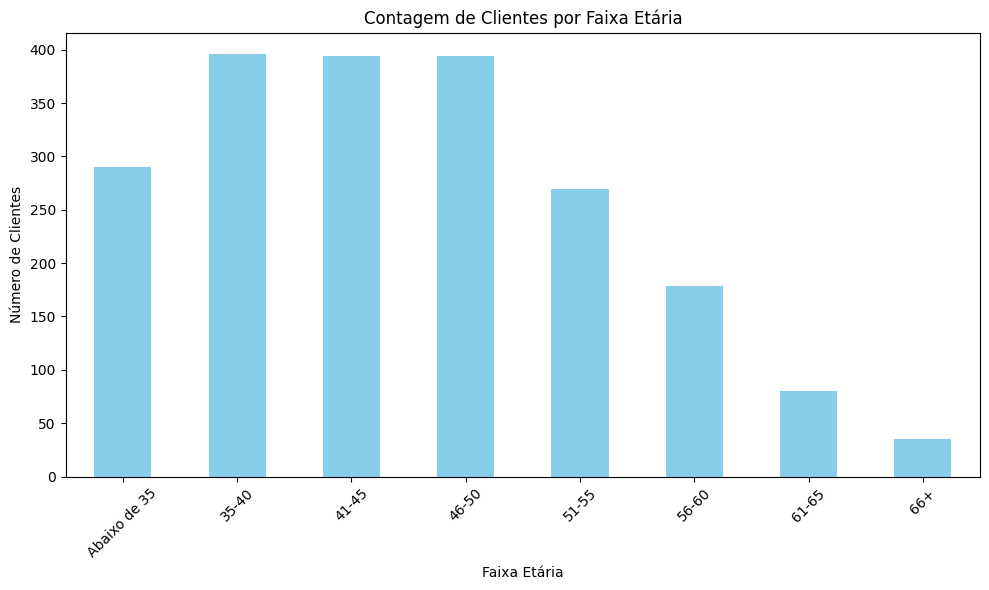

In [1471]:
# Visualizando as informações graficamente.

# Criando gráfico de barras
plt.figure(figsize=(10, 6))
contagem_faixa_etaria.plot(kind='bar', color='skyblue')

# Adicionando título e rótulos
plt.title('Contagem de Clientes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Clientes')

# Exibir gráfico
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar layout
plt.show()


Insight: **A partir dos 51 anos, observa-se uma queda gradual no número de churns**. Isso pode indicar que os clientes mais velhos tendem a ser mais fiéis, possivelmente devido a hábitos de uso ou menos disposição para mudanças.

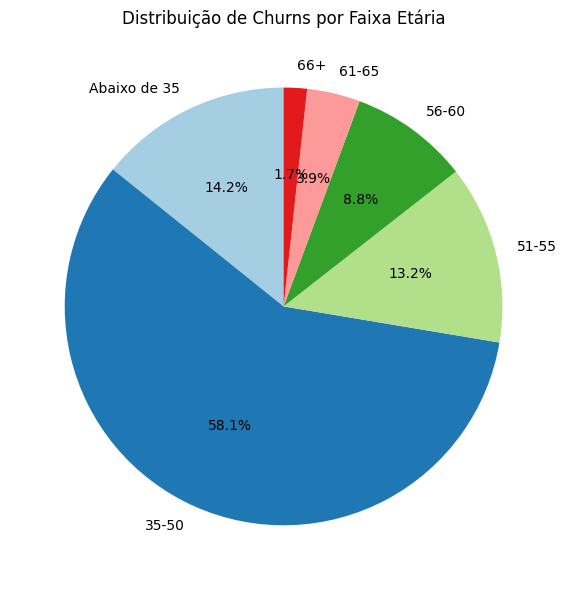

In [1472]:
# Plotando gráfico de pizza.
# Dados das faixas etárias e suas contagens de churn
faixas_etarias = ['Abaixo de 35','35-50', '51-55', '56-60', '61-65', '66+']
contagem_faixas = [290, 1184, 269, 179, 80, 35]

# Criar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(contagem_faixas, labels=faixas_etarias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Churns por Faixa Etária')

# Exibir gráfico
plt.tight_layout()
plt.show()


Insight: **A soma das faixas etárias de 35 a 50 anos corresponde a 58.1% de todos os churns**. Isso destaca essa faixa etária como um grupo chave que deve estar enfrentando mais insatisfação com o serviço ou produtos oferecidos, merecendo uma atenção especial.

### Insights sobre Churn no Banco Europeu

- A faixa de 35 a 50 é a mais crítica em termos de churn, sugerindo que as estratégias de retenção precisam ser mais intensivas para esses clientes.

- Embora a taxa de churn seja menor entre os clientes mais jovens, é crucial desenvolver estratégias para mantê-los engajados à medida que envelhecem e se aproximam de faixas etárias com maiores índices de churn.

Agora que os churns foram analisados por faixa etária, é importante investigar também quais faixas etárias apresentam maior retenção de clientes. Esse estudo permitirá identificar quais grupos etários o banco europeu deve focar para fortalecer sua base de clientes e, potencialmente, ajustar suas estratégias de retenção para esses segmentos específicos.




In [1473]:
# Analisando as faixas etárias com maior incidência de permanência aos serviços do banco.

# Agrupando as idades em faixas etárias.
faixa_etaria = pd.cut(clientes_stay['Idade'], bins=[0, 34, 40, 45, 50, 55, 60, 65, 100], right=True, 
                       labels=['Abaixo de 35', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'])

# Contar as ocorrências em cada faixa etária
contagem_faixa_etaria = faixa_etaria.value_counts().sort_index()

contagem_faixa_etaria

Idade
Abaixo de 35    3389
35-40           2344
41-45           1076
46-50            456
51-55            192
56-60            157
61-65            120
66+              229
Name: count, dtype: int64

Insight: Ao analisar as faixas etárias com maior incidência de permanência, observa-se uma concentração de clientes nas faixas etárias de abaixo de 35 até 40 anos. Esse dado é relevante, pois destaca um público mais jovem como predominante entre os clientes que permanecem no banco europeu.


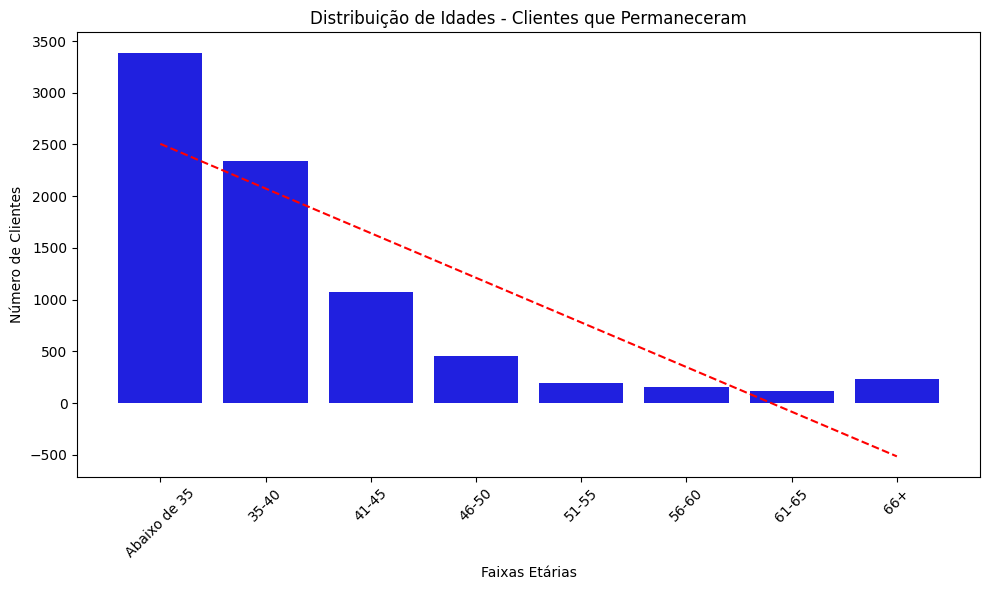

In [1474]:
# Gerando gráfico de barras.

# Dados das contagens de faixas etárias
faixas_etarias = ['Abaixo de 35', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+']
contagem_faixa_etaria = [3389, 2344, 1076, 456, 192, 157, 120, 229]

# Criando o gráfico de colunas
plt.figure(figsize=(10, 6))
sns.barplot(x=faixas_etarias, y=contagem_faixa_etaria, color='b')

# Adicionando a linha de tendência
z = np.polyfit(range(len(faixas_etarias)), contagem_faixa_etaria, 1)
p = np.poly1d(z)
plt.plot(range(len(faixas_etarias)), p(range(len(faixas_etarias))), color='r', linestyle='--')

# Personalizar o gráfico
plt.title('Distribuição de Idades - Clientes que Permaneceram')
plt.xlabel('Faixas Etárias')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


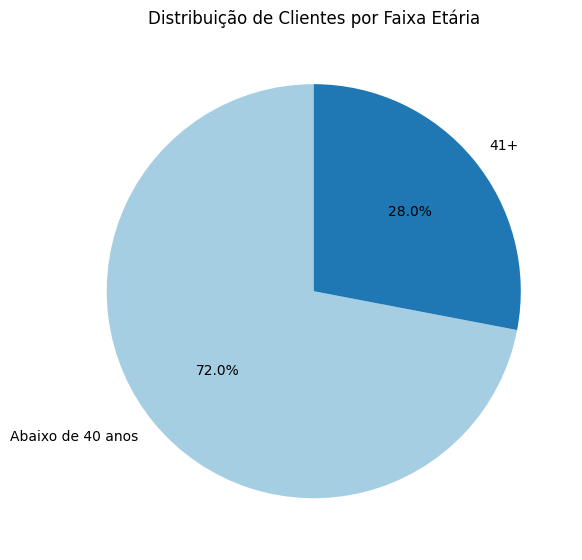

In [1475]:
# Gerando gráfico de pizza.

# Dados corrigidos das faixas etárias e suas contagens de churn
faixas_etarias = ['Abaixo de 40 anos', '41+']
contagem_faixa_etaria = [5733, sum([1076, 456, 192, 157, 120, 229])]  # Soma dos valores acima de 41

# Criar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(contagem_faixa_etaria, labels=faixas_etarias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Clientes por Faixa Etária')

# Exibir gráfico
plt.tight_layout()
plt.show()



Insight: Gráfico de pizza, que demonstra a distribuição da retenção dos clientes por faixa etária, reforça visualmente o quanto o banco é popular entre os clientes mais jovens, enquanto há uma saída mais expressiva dos clientes nas faixas etárias mais altas.

### Insights sobre as Faixas Etárias dos Clientes Retidos
- **Forte Retenção entre Jovens**: A maior parte dos clientes que continuam utilizando os serviços do banco está abaixo de 40 anos. Faixas etárias como "Abaixo de 35" e "35-40" representam uma proporção significativa do total de clientes retidos. Juntos, esses dois grupos compõem 72% dos clientes que permanecem com o banco, o que indica um claro domínio de um público mais jovem.

- **Declínio Gradual na Retenção com o Aumento da Idade**: A retenção de clientes começa a cair consideravelmente a partir dos 41 anos. O grupo de 41 a 45 anos ainda mantém uma presença relevante, mas essa quantidade diminui drasticamente à medida que a idade avança, com apenas 120 clientes na faixa de 61-65 anos e 229 acima de 66 anos. Esse padrão sugere que clientes mais velhos têm uma menor propensão a continuar com o banco.

- O dado de que 72% dos clientes retidos têm menos de 40 anos é um insight valioso para as estratégias de marketing e retenção. O banco pode se concentrar em fortalecer seu apelo aos clientes mais jovens, que parecem ser mais leais aos seus serviços. Campanhas voltadas para esse público podem continuar a ser eficazes para manter altas taxas de retenção.

### Conclusão
- A análise revelou uma **clara concentração de churn entre os clientes na faixa etária de 35 a 50 anos**, indicando que essa faixa merece atenção especial nas estratégias de retenção. Em contraste, a queda gradual nas taxas de churn a partir dos 51 anos sugere que os clientes mais velhos tendem a ser mais fiéis, possivelmente devido a hábitos de uso mais consolidados e a uma menor disposição para mudanças. 

- Além disso, o dado de que 72% dos clientes retidos têm menos de 40 anos destaca a forte retenção entre os jovens, evidenciando a necessidade de o banco fortalecer seu apelo a esse público. Campanhas direcionadas a clientes mais jovens podem ser eficazes em manter altas taxas de retenção, especialmente se forem alinhadas com suas expectativas e preferências.

- Embora a retenção de clientes diminua com o aumento da idade, existe uma oportunidade de explorar estratégias voltadas para faixas etárias mais velhas. Programas de fidelidade ou produtos personalizados para clientes acima de 50 anos podem contribuir para aumentar a retenção desse grupo, que atualmente representa uma parcela menor da base de clientes.

- Portanto, é fundamental investigar os motivos da insatisfação entre os clientes de 35 a 50 anos. Realizar pesquisas qualitativas ou grupos focais pode fornecer uma compreensão mais profunda das necessidades e expectativas desse grupo, permitindo que as estratégias de retenção sejam mais eficazes.

- Além disso, observa-se que não há correlações fortes entre as colunas, especialmente em relação à coluna 'Saiu'. Isso sugere que as motivações para o churn podem não estar tão relacionadas às variáveis numéricas, mas sim às variáveis categóricas, como 'País' e 'Gênero'. Portanto, é essencial investigar essas variáveis para entender melhor os fatores que influenciam a decisão dos clientes de deixar o serviço.



### 2 - Impacto da Demografia

Vamos aprofundar nossa análise na demografia dos clientes, buscando entender melhor como características como localização geográfica e gênero influenciam o churn no banco europeu. Para isso, iremos investigar padrões específicos que possam nos ajudar a compreender quais perfis de clientes têm maior probabilidade de deixar o banco.

A análise irá considerar variáveis como a região em que residem e a distribuição entre os gêneros. Ao examinar esses dados de forma mais detalhada, esperamos identificar tendências que possam explicar a relação entre demografia e churn, oferecendo insights valiosos para a formulação de estratégias de retenção.


In [1476]:
# Verificando os churns de cada país.
porcentagem = base_atualizada.groupby('Pais')['Saiu'].agg(['count', 'sum'])
porcentagem['Porcentagem de Saída'] = round((porcentagem['sum'] / porcentagem['count']) * 100, 3)
porcentagem

,count,sum,Porcentagem de Saída
Pais,,,
France,5014,810,16.155
Germany,2509,814,32.443
Spain,2477,413,16.673


Insight: É notório uma concentração de clientes da França, que representa uma parcela significativamente maior da base total do banco quando comparado com os outros países europeus, como Alemanha e Espanha. Esse desequilíbrio sugere que a atuação do banco é mais forte e consolidada no mercado francês.

A seguir, vamos gerar visualizações gráficas que ajudem a compreender melhor esses padrões, facilitando a tomada de decisões estratégicas baseadas nesses dados.

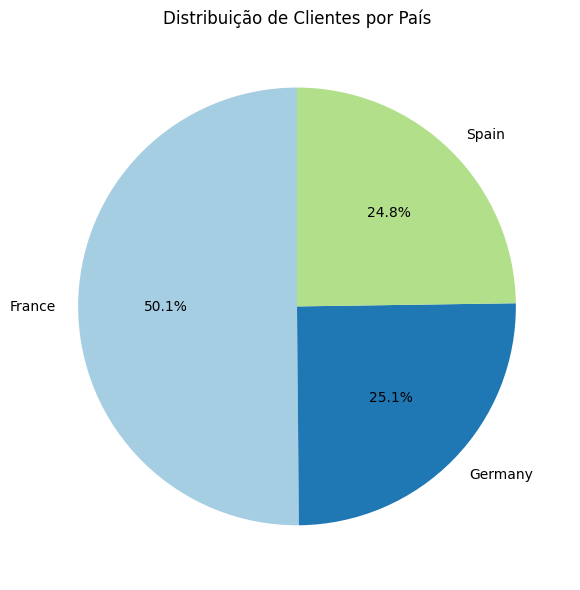

In [1477]:
# Definir os países e as quantidades de clientes.
paises = porcentagem.index
quantidade_clientes = porcentagem['count']

# Criar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(quantidade_clientes, labels=paises, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Clientes por País')

# Exibir gráfico
plt.tight_layout()
plt.show()


Insight: Ao analisar a distribuição dos clientes do banco europeu, percebe-se que a França representa a maior parte da base de clientes, com 50,1% do total. Esse é um dado relevante, pois mostra uma predominância clara de clientes franceses no banco europeu.

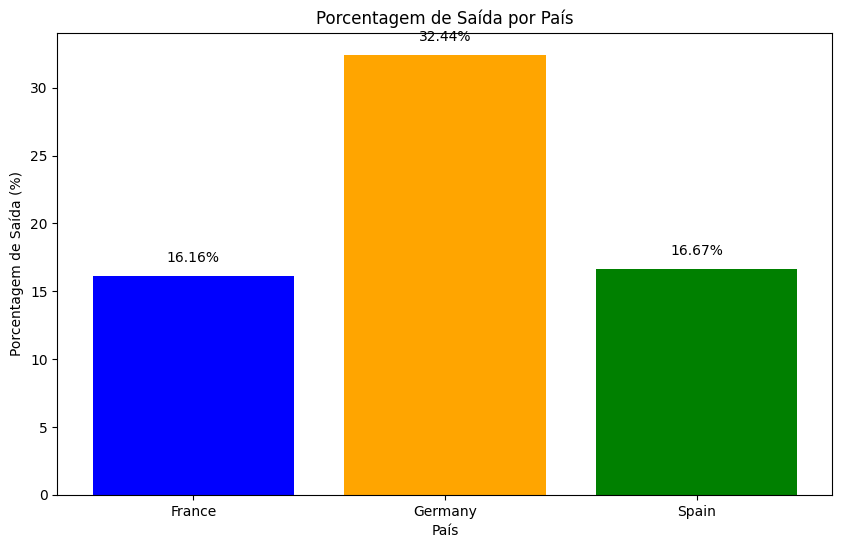

In [1478]:
# Plotando o gráfico das porcentagens de churn por país.

# Configurar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(porcentagem.index, porcentagem['Porcentagem de Saída'], color=['blue', 'orange', 'green'])

# Adicionar título e rótulos
plt.title('Porcentagem de Saída por País')
plt.xlabel('País')
plt.ylabel('Porcentagem de Saída (%)')

# Adicionar rótulos nas barras
for i in range(len(porcentagem)):
    plt.text(i, porcentagem['Porcentagem de Saída'].iloc[i] + 1, f"{porcentagem['Porcentagem de Saída'].iloc[i]:.2f}%", ha='center')

# Exibir o gráfico
plt.show()


### Insights sobre Churn no Banco Europeu

- Observa-se que a Alemanha se destaca como o país com a maior porcentagem de churn, refletindo um cenário preocupante para a instituição financeira. Este país apresenta quase o dobro de churns em comparação com os demais países onde o banco opera, o que sugere uma questão mais profunda em relação à satisfação e ao engajamento dos clientes nesse mercado específico. 

- Diante dessa realidade, torna-se essencial implementar uma estratégia robusta de retenção de clientes, com foco particular na Alemanha. Ações direcionadas podem incluir programas de fidelização mais atrativos, melhorias nos serviços oferecidos e um acompanhamento mais próximo das necessidades e feedbacks dos clientes. O objetivo primordial deve ser reduzir a quantidade de churns nesse país, promovendo um ambiente mais favorável e satisfatório para a base de clientes alemã, que, se bem cuidada, pode se transformar em um ativo valioso para o banco no longo prazo.

- Com o mercado francês já bem estabelecido, o foco na Alemanha pode equilibrar a carteira de clientes do banco, proporcionando crescimento sustentável. Além disso, explorar as oportunidades de expansão na Espanha, com uma base de clientes próxima à da Alemanha, o mercado espanhol apresenta um potencial de crescimento mais estável, desde que sejam evitados os problemas de retenção observados no mercado alemão.

Como já realizamos a exploração de uma das variáveis categóricas, é fundamental agora analisar a variável categórica 'Gênero' para entender melhor seu impacto nas taxas de churn.

In [1479]:
porcentagem1 = base_atualizada.groupby('Genero')['Saiu'].agg(['count', 'sum'])
porcentagem1['Porcentagem de Saída'] = round((porcentagem1['sum'] / porcentagem1['count']) * 100, 3)
porcentagem1

,count,sum,Porcentagem de Saída
Genero,,,
Female,4543,1139,25.072
Male,5457,898,16.456


### Comparação Geral de Churns por Gênero

Feminino: 4.543 clientes, com uma quantidade de 1.139 churns.

Masculino: 5.457 clientes, com uma quantidade de 898 churns.

A porcentagem de saída entre as clientes femininas foi de 25.07%, enquanto que entre os clientes masculinos foi de 16.46%.

Insight: Esses dados revelam uma porcentagem 52,3% maior de churns femininos em comparação com os masculinos, indicando que as mulheres estão mais propensas a deixar o banco.

In [1480]:
# Verificando os churns por País e por Gênero.

# Agrupar contagens de churn por país e gênero
contagens_churn = clientes_churn.groupby(['Pais', 'Genero']).size().reset_index(name='Contagem')

# Calcular o total de churns por país
total_por_pais = clientes_churn.groupby('Pais').size().reset_index(name='Total_Churns')

# Realizar o merge
resultado = pd.merge(contagens_churn, total_por_pais, on='Pais')

# Calcular a porcentagem
resultado['Porcentagem'] = round((resultado['Contagem'] / resultado['Total_Churns']) * 100, 3)

# Drop de coluna desnecessário
resultado.drop(columns = 'Total_Churns', inplace = True)

# Exibir o resultado
resultado


,Pais,Genero,Contagem,Porcentagem
0,France,Female,460,56.790
1,France,Male,350,43.210
2,Germany,Female,448,55.037
3,Germany,Male,366,44.963
4,Spain,Female,231,55.932
5,Spain,Male,182,44.068


### Insights sobre Churn no Banco Europeu

- Após a análise dos dados de churn no banco europeu, diversas informações relevantes foram descobertas, destacando diferenças significativas entre os gêneros e suas respectivas taxas de saída.

- Os dados também foram segmentados por país, permitindo uma análise mais granular das taxas de churn.

- As informações acima mostram que, em todos os países analisados (França, Alemanha e Espanha), as mulheres apresentam uma porcentagem de churn superior à dos homens. Em particular, as taxas de churn feminino são consistentemente mais altas, indicando uma possível necessidade de revisar as estratégias de retenção para este segmento.

### Conclusão
Esses insights podem fornecer direções estratégicas importantes para o banco. A diferença significativa nas taxas de churn entre gêneros e países é um indicativo de que ações específicas, como programas de engajamento direcionados ou melhorias nos serviços oferecidos, podem ser necessárias para reduzir a taxa de saída entre as clientes femininas.

### MELHORAR ESSA CONCLUSÃO E SE LIGAR NA COLUNA SALDO QUE TEM ALGUNS INSIGHTS.